# Dissertation Code

This Jupyter Notebook contains the implementation and experiments for the dissertation project.

## Contents
- Data loading and preprocessing
- Feature extraction
- Model training and evaluation
- Results and analysis

Please refer to the README.md file for setup and usage instructions.

# Code for Extracting zip file


In [ ]:
import zipfile
import os

# Path to the zip file where it is loaded
zip_path = '/content/Data.zip'  # Ensure this is the correct path

# Target directory where zip file to be extracted
extract_to = '/content'  # Change this if you need

# Check if the zip file exists
if os.path.exists(zip_path):
    # Open the zip file
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Extract all the contents into the directory
            zip_ref.extractall(extract_to)
        print('Extraction complete.')
    except zipfile.BadZipFile:
        print('Failed to extract: The file may be corrupted or not a zip file.')
else:
    print('File does not exist at the specified path.')


Extraction complete.


# Trendline for Skin conductance, Phasic and Tonic Components

Checking for file: /content/Data/S1/Midterm 1/EDA.csv
Loading file: /content/Data/S1/Midterm 1/EDA.csv
Checking for file: /content/Data/S1/Midterm 2/EDA.csv
Loading file: /content/Data/S1/Midterm 2/EDA.csv
Checking for file: /content/Data/S1/Final/EDA.csv
Loading file: /content/Data/S1/Final/EDA.csv
Checking for file: /content/Data/S2/Midterm 1/EDA.csv
Loading file: /content/Data/S2/Midterm 1/EDA.csv
Checking for file: /content/Data/S2/Midterm 2/EDA.csv
Loading file: /content/Data/S2/Midterm 2/EDA.csv
Checking for file: /content/Data/S2/Final/EDA.csv
Loading file: /content/Data/S2/Final/EDA.csv
Checking for file: /content/Data/S3/Midterm 1/EDA.csv
Loading file: /content/Data/S3/Midterm 1/EDA.csv
Checking for file: /content/Data/S3/Midterm 2/EDA.csv
Loading file: /content/Data/S3/Midterm 2/EDA.csv
Checking for file: /content/Data/S3/Final/EDA.csv
Loading file: /content/Data/S3/Final/EDA.csv
Checking for file: /content/Data/S4/Midterm 1/EDA.csv
Loading file: /content/Data/S4/Midterm 1/ED

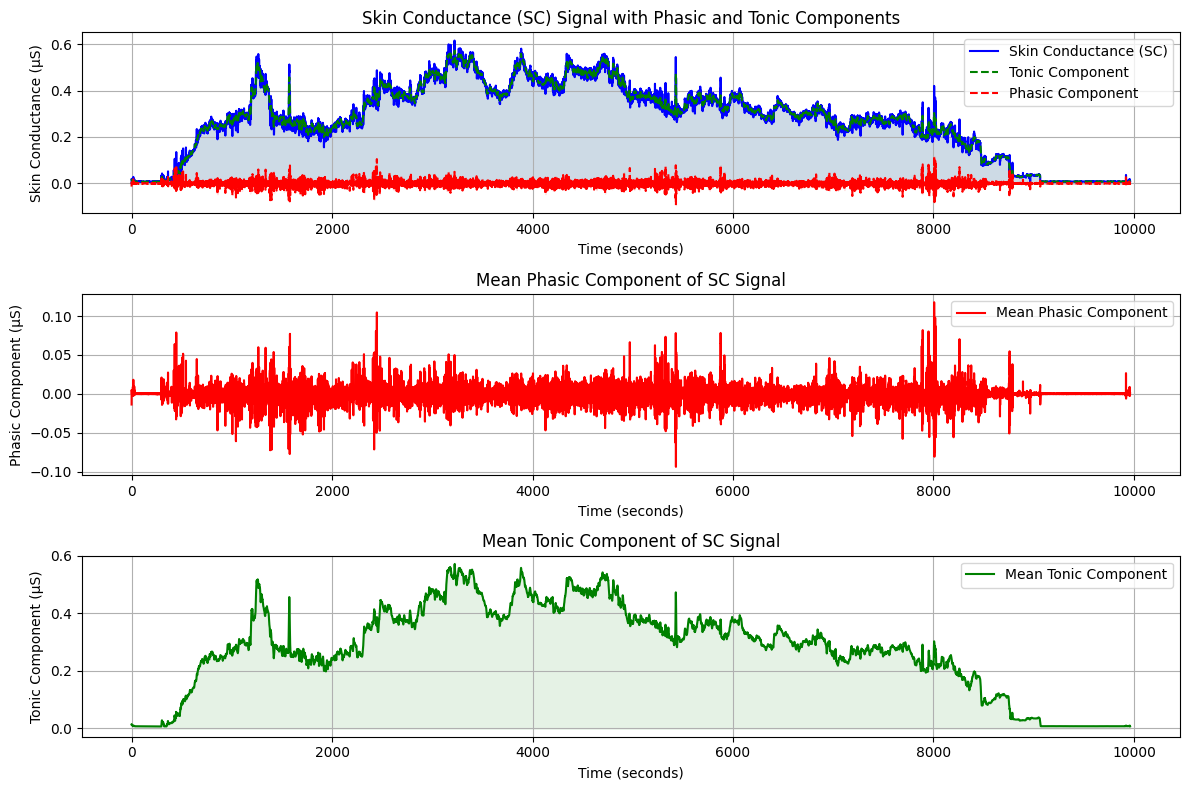

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import resample

# Path to the dataset directory
data_dir = '/content/Data'
# List of students (directories S1 to S10)
students = [f'S{i}' for i in range(1, 11)]
exams = ['Midterm 1', 'Midterm 2', 'Final']

# Initialize lists to store all EDA signals
all_eda_signals = []
all_phasic_components = []
all_tonic_components = []

# Process each student's EDA data for each exam
for student in students:
    for exam in exams:
        eda_path = os.path.join(data_dir, student, exam, 'EDA.csv')
        print(f'Checking for file: {eda_path}')  # Debugging line
        if os.path.exists(eda_path):
            print(f'Loading file: {eda_path}')  # Debugging line
            # Load the EDA data
            eda_data = pd.read_csv(eda_path, header=None)
            eda_readings = eda_data.iloc[2:, 0].astype(float).values

            # Generate a time axis based on the frequency
            frequency = eda_data.iloc[1, 0]
            time_axis = np.arange(len(eda_readings)) / frequency

            # Decompose the EDA signal into tonic and phasic components
            tonic_component = pd.Series(eda_readings).rolling(window=int(frequency * 10), min_periods=1, center=True).mean().values
            phasic_component = eda_readings - tonic_component

            # Append the decomposed components
            all_eda_signals.append(eda_readings)
            all_phasic_components.append(phasic_component)
            all_tonic_components.append(tonic_component)
        else:
            print(f'File not found: {eda_path}')  # Debugging line

# Verify if any data was loaded
if not all_eda_signals:
    print("No EDA data loaded. Please check the file paths.")
else:
    # Determine the minimum length of the signals
    min_length = min(len(signal) for signal in all_eda_signals)

    # Resample all signals to the minimum length
    all_eda_signals_resampled = [resample(signal, min_length) for signal in all_eda_signals]
    all_phasic_components_resampled = [resample(signal, min_length) for signal in all_phasic_components]
    all_tonic_components_resampled = [resample(signal, min_length) for signal in all_tonic_components]

    # Compute the mean of the signals
    mean_eda_signal = np.mean(all_eda_signals_resampled, axis=0)
    mean_phasic_component = np.mean(all_phasic_components_resampled, axis=0)
    mean_tonic_component = np.mean(all_tonic_components_resampled, axis=0)

    # Generate a time axis for the resampled signals
    time_axis_resampled = np.arange(min_length) / frequency

    # Plotting the results
    plt.figure(figsize=(12, 8))

    # Combined plot for SC Signal with Phasic and Tonic Components
    plt.subplot(3, 1, 1)
    plt.plot(time_axis_resampled, mean_eda_signal, label='Skin Conductance (SC)', color='blue', linewidth=1.5)
    plt.plot(time_axis_resampled, mean_tonic_component, label='Tonic Component', color='green', linestyle='--')
    plt.plot(time_axis_resampled, mean_phasic_component, label='Phasic Component', color='red', linestyle='--')
    plt.fill_between(time_axis_resampled, mean_eda_signal, color='blue', alpha=0.1)
    plt.fill_between(time_axis_resampled, mean_tonic_component, color='green', alpha=0.1)
    plt.fill_between(time_axis_resampled, mean_phasic_component, color='red', alpha=0.1)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Skin Conductance (µS)')
    plt.title('Skin Conductance (SC) Signal with Phasic and Tonic Components')
    plt.legend()
    plt.grid(True)

    # Separate Mean Phasic Component
    plt.subplot(3, 1, 2)
    plt.plot(time_axis_resampled, mean_phasic_component, label='Mean Phasic Component', color='red')
    plt.fill_between(time_axis_resampled, mean_phasic_component, color='red', alpha=0.1)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Phasic Component (µS)')
    plt.title('Mean Phasic Component of SC Signal')
    plt.legend()
    plt.grid(True)

    # Separate Mean Tonic Component
    plt.subplot(3, 1, 3)
    plt.plot(time_axis_resampled, mean_tonic_component, label='Mean Tonic Component', color='green')
    plt.fill_between(time_axis_resampled, mean_tonic_component, color='green', alpha=0.1)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Tonic Component (µS)')
    plt.title('Mean Tonic Component of SC Signal')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



#Trendline Skin conductance, Phasic and Tonic Components according to Exam type

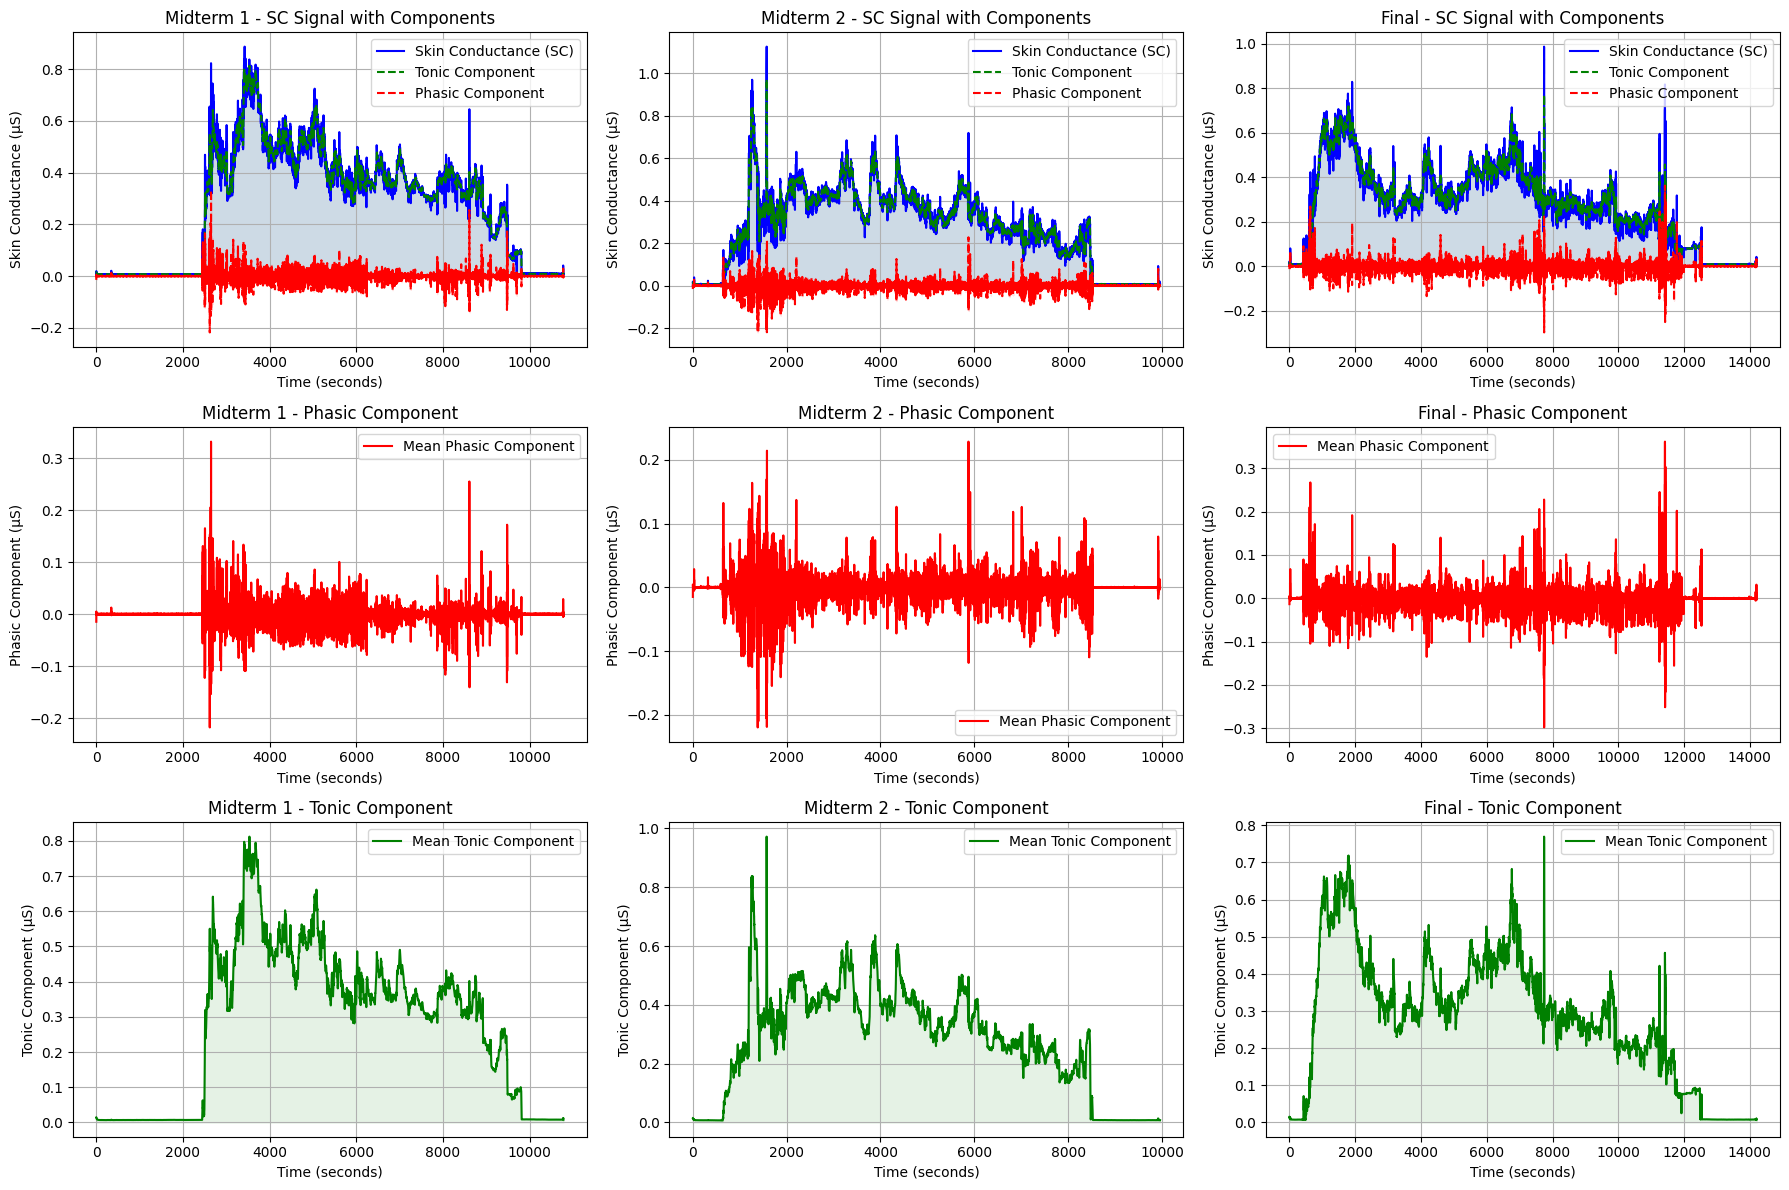

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import resample

#Path to the dataset directory
data_dir = '/content/Data'
# List of students (directories S1 to S10)
students = [f'S{i}' for i in range(1, 11)]
exams = ['Midterm 1', 'Midterm 2', 'Final']

# Function to process EDA data for a given exam
def process_exam_data(exam):
    eda_signals = []
    phasic_components = []
    tonic_components = []

    for student in students:
        eda_path = os.path.join(data_dir, student, exam, 'EDA.csv')
        if os.path.exists(eda_path):
            # Load the EDA data
            eda_data = pd.read_csv(eda_path, header=None)
            eda_readings = eda_data.iloc[2:, 0].astype(float).values

            # Generate a time axis based on the frequency
            frequency = eda_data.iloc[1, 0]
            time_axis = np.arange(len(eda_readings)) / frequency

            # Decompose the EDA signal into tonic and phasic components
            tonic_component = pd.Series(eda_readings).rolling(window=int(frequency * 10), min_periods=1, center=True).mean().values
            phasic_component = eda_readings - tonic_component

            # Append the decomposed components
            eda_signals.append(eda_readings)
            phasic_components.append(phasic_component)
            tonic_components.append(tonic_component)

    # Determine the minimum length of the signals
    if eda_signals:
        min_length = min(len(signal) for signal in eda_signals)

        # Resample all signals to the minimum length
        eda_signals_resampled = [resample(signal, min_length) for signal in eda_signals]
        phasic_components_resampled = [resample(signal, min_length) for signal in phasic_components]
        tonic_components_resampled = [resample(signal, min_length) for signal in tonic_components]

        # Compute the mean of the signals
        mean_eda_signal = np.mean(eda_signals_resampled, axis=0)
        mean_phasic_component = np.mean(phasic_components_resampled, axis=0)
        mean_tonic_component = np.mean(tonic_components_resampled, axis=0)

        return mean_eda_signal, mean_phasic_component, mean_tonic_component, frequency, min_length

    return None, None, None, None, None

# Process data for each exam
results = {}
for exam in exams:
    results[exam] = process_exam_data(exam)

# Plotting the results
plt.figure(figsize=(18, 12))

for i, exam in enumerate(exams):
    mean_eda_signal, mean_phasic_component, mean_tonic_component, frequency, min_length = results[exam]

    if mean_eda_signal is not None:
        time_axis_resampled = np.arange(min_length) / frequency

        # Combined plot for SC Signal with Phasic and Tonic Components
        plt.subplot(3, 3, i + 1)
        plt.plot(time_axis_resampled, mean_eda_signal, label='Skin Conductance (SC)', color='blue', linewidth=1.5)
        plt.plot(time_axis_resampled, mean_tonic_component, label='Tonic Component', color='green', linestyle='--')
        plt.plot(time_axis_resampled, mean_phasic_component, label='Phasic Component', color='red', linestyle='--')
        plt.fill_between(time_axis_resampled, mean_eda_signal, color='blue', alpha=0.1)
        plt.fill_between(time_axis_resampled, mean_tonic_component, color='green', alpha=0.1)
        plt.fill_between(time_axis_resampled, mean_phasic_component, color='red', alpha=0.1)
        plt.xlabel('Time (seconds)')
        plt.ylabel('Skin Conductance (µS)')
        plt.title(f'{exam} - SC Signal with Components')
        plt.legend()
        plt.grid(True)

        # Separate Mean Phasic Component
        plt.subplot(3, 3, i + 4)
        plt.plot(time_axis_resampled, mean_phasic_component, label='Mean Phasic Component', color='red')
        plt.fill_between(time_axis_resampled, mean_phasic_component, color='red', alpha=0.1)
        plt.xlabel('Time (seconds)')
        plt.ylabel('Phasic Component (µS)')
        plt.title(f'{exam} - Phasic Component')
        plt.legend()
        plt.grid(True)

        # Separate Mean Tonic Component
        plt.subplot(3, 3, i + 7)
        plt.plot(time_axis_resampled, mean_tonic_component, label='Mean Tonic Component', color='green')
        plt.fill_between(time_axis_resampled, mean_tonic_component, color='green', alpha=0.1)
        plt.xlabel('Time (seconds)')
        plt.ylabel('Tonic Component (µS)')
        plt.title(f'{exam} - Tonic Component')
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()


# Code for Random Forest Using all stress factors and hyperperameters


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import re

# Define the path to the data directory and grades file
data_dir = '/content/Data'
grades_file = '/content/StudentGrades.txt'

# Read the grades data from the file
grades_data = {
    'Student': [],
    'Midterm 1': [],
    'Midterm 2': [],
    'Final': []
}

# Function to clean and process each line
def clean_line(line):
    line = line.replace('ñ', '-').replace('–', '-').replace('—', '-')
    line = re.sub(r'[^A-Za-z0-9\s-]', '', line)  # Remove any other non-standard characters
    return line.strip()

# Function to normalize exam names
def normalize_exam_name(exam):
    if 'Midterm 1' in exam:
        return 'Midterm 1'
    elif 'Midterm 2' in exam:
        return 'Midterm 2'
    elif 'Final' in exam:
        return 'Final'
    return exam

# Extract grades from the file
try:
    with open(grades_file, 'r', encoding='latin-1') as file:
        lines = file.readlines()
        exam = None
        for line in lines:
            line = line.strip()
            if line.startswith('GRADES'):
                exam = normalize_exam_name(line.split('-')[1].strip().title())
                print(f"Processing grades for {exam}")
            elif line and exam:
                line = clean_line(line)
                parts = line.split()
                if len(parts) == 2:
                    student = parts[0].strip()
                    grade = int(parts[1].strip())
                    if student not in grades_data['Student']:
                        grades_data['Student'].append(student)
                        grades_data['Midterm 1'].append(np.nan)
                        grades_data['Midterm 2'].append(np.nan)
                        grades_data['Final'].append(np.nan)
                    idx = grades_data['Student'].index(student)
                    grades_data[exam][idx] = grade
                else:
                    print(f"Skipping line due to unexpected format: {line}")
        print("File reading successful. Grades data extracted.")
except Exception as e:
    print(f"Error reading file: {e}")

# Ensure all lists in grades_data are of the same length
max_length = len(grades_data['Student'])
for key in grades_data:
    while len(grades_data[key]) < max_length:
        grades_data[key].append(np.nan)

# Convert to DataFrame
grades_df = pd.DataFrame(grades_data)
grades_df.columns = ['Student', 'Midterm 1', 'Midterm 2', 'Final']
print("Grades DataFrame created successfully.")
print(grades_df.head())

# Function to extract features from physiological data
def extract_features(student, exam, data_type):
    file_path = os.path.join(data_dir, f'S{int(student[1:]):d}', exam, f'{data_type}.csv')
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, header=None)
        readings = data.iloc[2:, 0].astype(float).values
        features = {
            f'{data_type} mean': np.mean(readings),
            f'{data_type} std': np.std(readings),
            f'{data_type} max': np.max(readings),
            f'{data_type} min': np.min(readings)
        }
        return features
    else:
        print(f"File not found: {file_path}")
        return {f'{data_type} mean': np.nan, f'{data_type} std': np.nan, f'{data_type} max': np.nan, f'{data_type} min': np.nan}

# Extract features for all students and exams
students = [f'S{i:02d}' for i in range(1, 11)]
exams = ['Midterm 1', 'Midterm 2', 'Final']
data_types = ['EDA', 'HR', 'TEMP', 'BVP', 'IBI', 'ACC']
features_data = []

for student in students:
    student_features = {'Student': student}
    for exam in exams:
        for data_type in data_types:
            features = extract_features(student, exam, data_type)
            student_features.update(features)
    features_data.append(student_features)

# Convert to DataFrame
features_df = pd.DataFrame(features_data)
print("Features DataFrame created successfully.")
print(features_df.head())

# Combine grades data with features
data_df = pd.merge(grades_df, features_df, on='Student')
print("Combined DataFrame created successfully.")
print(data_df.head())

# Create classification columns based on grades
data_df['Midterm 1 Class'] = np.where(data_df['Midterm 1'] >= 80, 'Good', 'Bad')
data_df['Midterm 2 Class'] = np.where(data_df['Midterm 2'] >= 80, 'Good', 'Bad')
data_df['Final Class'] = np.where(data_df['Final'] >= 160, 'Good', 'Bad')

# Drop the 'Student' column and original grade columns as they're not needed for the model
data_df.drop(columns=['Student', 'Midterm 1', 'Midterm 2', 'Final'], inplace=True)

# Prepare features and target variables for classification
X = data_df.drop(columns=['Midterm 1 Class', 'Midterm 2 Class', 'Final Class'])
y_midterm1_class = data_df['Midterm 1 Class']
y_midterm2_class = data_df['Midterm 2 Class']
y_final_class = data_df['Final Class']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

def cross_val_evaluation(X, y, exam_name):
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name}: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name}: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name}:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")

# Cross-validation evaluation for Midterm 1
cross_val_evaluation(X_scaled, y_midterm1_class, 'Midterm 1')

# Cross-validation evaluation for Midterm 2
cross_val_evaluation(X_scaled, y_midterm2_class, 'Midterm 2')

# Cross-validation evaluation for Final
cross_val_evaluation(X_scaled, y_final_class, 'Final')



Processing grades for Midterm 1
Skipping line due to unexpected format: ------------------
Processing grades for Midterm 2
Skipping line due to unexpected format: ------------------
Processing grades for Final
Skipping line due to unexpected format: ---------------------------
File reading successful. Grades data extracted.
Grades DataFrame created successfully.
  Student  Midterm 1  Midterm 2  Final
0     S01         78         82    182
1     S02         82         85    180
2     S03         77         90    188
3     S04         75         77    149
4     S05         67         77    157
Features DataFrame created successfully.
  Student  EDA mean   EDA std   EDA max  EDA min     HR mean     HR std  \
0     S01  0.102925  0.083391  0.440778      0.0  106.121509  18.716389   
1     S02  0.078296  0.095946  0.733188      0.0  119.901866  21.711150   
2     S03  0.169664  0.257326  1.699582      0.0  104.510099  21.949624   
3     S04  0.526248  0.612592  6.570713      0.0   92.670820

#Code for GBM Using all stress factors and hyperperameters

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import re

#Path to the data directory and grades file
data_dir = '/content/Data'
grades_file = '/content/StudentGrades.txt'

# Read the grades data from the file
grades_data = {
    'Student': [],
    'Midterm 1': [],
    'Midterm 2': [],
    'Final': []
}

# Function to clean and process each line
def clean_line(line):
    line = line.replace('ñ', '-').replace('–', '-').replace('—', '-')
    line = re.sub(r'[^A-Za-z0-9\s-]', '', line)  # Remove any other non-standard characters
    return line.strip()

# Function to normalize exam names
def normalize_exam_name(exam):
    if 'Midterm 1' in exam:
        return 'Midterm 1'
    elif 'Midterm 2' in exam:
        return 'Midterm 2'
    elif 'Final' in exam:
        return 'Final'
    return exam

# Extract grades from the file
try:
    with open(grades_file, 'r', encoding='latin-1') as file:
        lines = file.readlines()
        exam = None
        for line in lines:
            line = line.strip()
            if line.startswith('GRADES'):
                exam = normalize_exam_name(line.split('-')[1].strip().title())
                print(f"Processing grades for {exam}")
            elif line and exam:
                line = clean_line(line)
                parts = line.split()
                if len(parts) == 2:
                    student = parts[0].strip()
                    grade = int(parts[1].strip())
                    if student not in grades_data['Student']:
                        grades_data['Student'].append(student)
                        grades_data['Midterm 1'].append(np.nan)
                        grades_data['Midterm 2'].append(np.nan)
                        grades_data['Final'].append(np.nan)
                    idx = grades_data['Student'].index(student)
                    grades_data[exam][idx] = grade
                else:
                    print(f"Skipping line due to unexpected format: {line}")
        print("File reading successful. Grades data extracted.")
except Exception as e:
    print(f"Error reading file: {e}")

# Ensure all lists in grades_data are of the same length
max_length = len(grades_data['Student'])
for key in grades_data:
    while len(grades_data[key]) < max_length:
        grades_data[key].append(np.nan)

# Convert to DataFrame
grades_df = pd.DataFrame(grades_data)
grades_df.columns = ['Student', 'Midterm 1', 'Midterm 2', 'Final']
print("Grades DataFrame created successfully.")
print(grades_df.head())

# Function to extract features from physiological data
def extract_features(student, exam, data_type):
    file_path = os.path.join(data_dir, f'S{int(student[1:]):d}', exam, f'{data_type}.csv')
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, header=None)
        readings = data.iloc[2:, 0].astype(float).values
        features = {
            f'{data_type} mean': np.mean(readings),
            f'{data_type} std': np.std(readings),
            f'{data_type} max': np.max(readings),
            f'{data_type} min': np.min(readings)
        }
        return features
    else:
        print(f"File not found: {file_path}")
        return {f'{data_type} mean': np.nan, f'{data_type} std': np.nan, f'{data_type} max': np.nan, f'{data_type} min': np.nan}

# Extract features for all students and exams
students = [f'S{i:02d}' for i in range(1, 11)]
exams = ['Midterm 1', 'Midterm 2', 'Final']
data_types = ['EDA', 'HR', 'TEMP', 'BVP', 'IBI', 'ACC']
features_data = []

for student in students:
    student_features = {'Student': student}
    for exam in exams:
        for data_type in data_types:
            features = extract_features(student, exam, data_type)
            student_features.update(features)
    features_data.append(student_features)

# Convert to DataFrame
features_df = pd.DataFrame(features_data)
print("Features DataFrame created successfully.")
print(features_df.head())

# Combine grades data with features
data_df = pd.merge(grades_df, features_df, on='Student')
print("Combined DataFrame created successfully.")
print(data_df.head())

# Create classification columns based on grades
data_df['Midterm 1 Class'] = np.where(data_df['Midterm 1'] >= 80, 'Good', 'Bad')
data_df['Midterm 2 Class'] = np.where(data_df['Midterm 2'] >= 80, 'Good', 'Bad')
data_df['Final Class'] = np.where(data_df['Final'] >= 160, 'Good', 'Bad')

# Drop the 'Student' column and original grade columns as they're not needed for the model
data_df.drop(columns=['Student', 'Midterm 1', 'Midterm 2', 'Final'], inplace=True)

# Prepare features and target variables for classification
X = data_df.drop(columns=['Midterm 1 Class', 'Midterm 2 Class', 'Final Class'])
y_midterm1_class = data_df['Midterm 1 Class']
y_midterm2_class = data_df['Midterm 2 Class']
y_final_class = data_df['Final Class']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Hyperparameter tuning using GridSearchCV for GBM
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

def cross_val_evaluation_gbm(X, y, exam_name):
    model = GradientBoostingClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid_gbm, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name} using GBM: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name} using GBM: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name} using GBM:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")

# Cross-validation evaluation for Midterm 1 using GBM
cross_val_evaluation_gbm(X_scaled, y_midterm1_class, 'Midterm 1')

# Cross-validation evaluation for Midterm 2 using GBM
cross_val_evaluation_gbm(X_scaled, y_midterm2_class, 'Midterm 2')

# Cross-validation evaluation for Final using GBM
cross_val_evaluation_gbm(X_scaled, y_final_class, 'Final')


Processing grades for Midterm 1
Skipping line due to unexpected format: ------------------
Processing grades for Midterm 2
Skipping line due to unexpected format: ------------------
Processing grades for Final
Skipping line due to unexpected format: ---------------------------
File reading successful. Grades data extracted.
Grades DataFrame created successfully.
  Student  Midterm 1  Midterm 2  Final
0     S01         78         82    182
1     S02         82         85    180
2     S03         77         90    188
3     S04         75         77    149
4     S05         67         77    157
Features DataFrame created successfully.
  Student  EDA mean   EDA std   EDA max  EDA min     HR mean     HR std  \
0     S01  0.102925  0.083391  0.440778      0.0  106.121509  18.716389   
1     S02  0.078296  0.095946  0.733188      0.0  119.901866  21.711150   
2     S03  0.169664  0.257326  1.699582      0.0  104.510099  21.949624   
3     S04  0.526248  0.612592  6.570713      0.0   92.670820

# Code for XGBoost and CatBoost without preprocessing


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import re
import xgboost as xgb
from catboost import CatBoostClassifier

# Path to the data directory and grades file
data_dir = '/content/Data'
grades_file = '/content/StudentGrades.txt'

# Read the grades data from the file
grades_data = {
    'Student': [],
    'Midterm 1': [],
    'Midterm 2': [],
    'Final': []
}

# Function to clean and process each line
def clean_line(line):
    line = line.replace('ñ', '-').replace('–', '-').replace('—', '-')
    line = re.sub(r'[^A-Za-z0-9\s-]', '', line)  # Remove any other non-standard characters
    return line.strip()

# Function to normalize exam names
def normalize_exam_name(exam):
    if 'Midterm 1' in exam:
        return 'Midterm 1'
    elif 'Midterm 2' in exam:
        return 'Midterm 2'
    elif 'Final' in exam:
        return 'Final'
    return exam

# Extract grades from the file
try:
    with open(grades_file, 'r', encoding='latin-1') as file:
        lines = file.readlines()
        exam = None
        for line in lines:
            line = line.strip()
            if line.startswith('GRADES'):
                exam = normalize_exam_name(line.split('-')[1].strip().title())
                print(f"Processing grades for {exam}")
            elif line and exam:
                line = clean_line(line)
                parts = line.split()
                if len(parts) == 2:
                    student = parts[0].strip()
                    grade = int(parts[1].strip())
                    if student not in grades_data['Student']:
                        grades_data['Student'].append(student)
                        grades_data['Midterm 1'].append(np.nan)
                        grades_data['Midterm 2'].append(np.nan)
                        grades_data['Final'].append(np.nan)
                    idx = grades_data['Student'].index(student)
                    grades_data[exam][idx] = grade
                else:
                    print(f"Skipping line due to unexpected format: {line}")
        print("File reading successful. Grades data extracted.")
except Exception as e:
    print(f"Error reading file: {e}")

# Ensure all lists in grades_data are of the same length
max_length = len(grades_data['Student'])
for key in grades_data:
    while len(grades_data[key]) < max_length:
        grades_data[key].append(np.nan)

# Convert to DataFrame
grades_df = pd.DataFrame(grades_data)
grades_df.columns = ['Student', 'Midterm 1', 'Midterm 2', 'Final']
print("Grades DataFrame created successfully.")
print(grades_df.head())

# Function to extract features from physiological data
def extract_features(student, exam, data_type):
    file_path = os.path.join(data_dir, f'S{int(student[1:]):d}', exam, f'{data_type}.csv')
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, header=None)
        readings = data.iloc[2:, 0].astype(float).values
        features = {
            f'{data_type} mean': np.mean(readings),
            f'{data_type} std': np.std(readings),
            f'{data_type} max': np.max(readings),
            f'{data_type} min': np.min(readings)
        }
        return features
    else:
        print(f"File not found: {file_path}")
        return {f'{data_type} mean': np.nan, f'{data_type} std': np.nan, f'{data_type} max': np.nan, f'{data_type} min': np.nan}

# Extract features for all students and exams
students = [f'S{i:02d}' for i in range(1, 11)]
exams = ['Midterm 1', 'Midterm 2', 'Final']
data_types = ['EDA', 'HR', 'TEMP', 'BVP', 'IBI', 'ACC']
features_data = []

for student in students:
    student_features = {'Student': student}
    for exam in exams:
        for data_type in data_types:
            features = extract_features(student, exam, data_type)
            student_features.update(features)
    features_data.append(student_features)

# Convert to DataFrame
features_df = pd.DataFrame(features_data)
print("Features DataFrame created successfully.")
print(features_df.head())

# Combine grades data with features
data_df = pd.merge(grades_df, features_df, on='Student')
print("Combined DataFrame created successfully.")
print(data_df.head())

# Create classification columns based on grades
data_df['Midterm 1 Class'] = np.where(data_df['Midterm 1'] >= 80, 'Good', 'Bad')
data_df['Midterm 2 Class'] = np.where(data_df['Midterm 2'] >= 80, 'Good', 'Bad')
data_df['Final Class'] = np.where(data_df['Final'] >= 160, 'Good', 'Bad')

# Encode classification labels to numeric values
le = LabelEncoder()
data_df['Midterm 1 Class'] = le.fit_transform(data_df['Midterm 1 Class'])
data_df['Midterm 2 Class'] = le.fit_transform(data_df['Midterm 2 Class'])
data_df['Final Class'] = le.fit_transform(data_df['Final Class'])

# Drop the 'Student' column and original grade columns as they're not needed for the model
data_df.drop(columns=['Student', 'Midterm 1', 'Midterm 2', 'Final'], inplace=True)

# Prepare features and target variables for classification
X = data_df.drop(columns=['Midterm 1 Class', 'Midterm 2 Class', 'Final Class'])
y_midterm1_class = data_df['Midterm 1 Class']
y_midterm2_class = data_df['Midterm 2 Class']
y_final_class = data_df['Final Class']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# XGBoost Cross-Validation
def xgb_cross_val_evaluation(X, y, exam_name):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    model = xgb.XGBClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name} with XGBoost: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name} with XGBoost: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name} with XGBoost:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")

# CatBoost Cross-Validation
def catboost_cross_val_evaluation(X, y, exam_name):
    param_grid = {
        'iterations': [100, 200, 300],
        'depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5],
        'border_count': [32, 50, 100]
    }

    model = CatBoostClassifier(random_state=42, silent=True)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name} with CatBoost: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name} with CatBoost: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name} with CatBoost:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")

# Cross-validation evaluation for Midterm 1
xgb_cross_val_evaluation(X_scaled, y_midterm1_class, 'Midterm 1')
catboost_cross_val_evaluation(X_scaled, y_midterm1_class, 'Midterm 1')

# Cross-validation evaluation for Midterm 2
xgb_cross_val_evaluation(X_scaled, y_midterm2_class, 'Midterm 2')
catboost_cross_val_evaluation(X_scaled, y_midterm2_class, 'Midterm 2')

# Cross-validation evaluation for Final
xgb_cross_val_evaluation(X_scaled, y_final_class, 'Final')
catboost_cross_val_evaluation(X_scaled, y_final_class, 'Final')


Processing grades for Midterm 1
Skipping line due to unexpected format: ------------------
Processing grades for Midterm 2
Skipping line due to unexpected format: ------------------
Processing grades for Final
Skipping line due to unexpected format: ---------------------------
File reading successful. Grades data extracted.
Grades DataFrame created successfully.
  Student  Midterm 1  Midterm 2  Final
0     S01         78         82    182
1     S02         82         85    180
2     S03         77         90    188
3     S04         75         77    149
4     S05         67         77    157
Features DataFrame created successfully.
  Student  EDA mean   EDA std   EDA max  EDA min     HR mean     HR std  \
0     S01  0.102925  0.083391  0.440778      0.0  106.121509  18.716389   
1     S02  0.078296  0.095946  0.733188      0.0  119.901866  21.711150   
2     S03  0.169664  0.257326  1.699582      0.0  104.510099  21.949624   
3     S04  0.526248  0.612592  6.570713      0.0   92.670820

# Code for XGBoost and CatBoost with preprocesing (SMOTE-> A resampling technique)

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingClassifier
import re
import xgboost as xgb
import catboost as cb
from imblearn.over_sampling import SMOTE

# Path to the data directory and grades file
data_dir = '/content/Data'
grades_file = '/content/StudentGrades.txt'

# Read the grades data from the file
grades_data = {
    'Student': [],
    'Midterm 1': [],
    'Midterm 2': [],
    'Final': []
}

# Function to clean and process each line
def clean_line(line):
    line = line.replace('ñ', '-').replace('–', '-').replace('—', '-')
    line = re.sub(r'[^A-Za-z0-9\s-]', '', line)  # Remove any other non-standard characters
    return line.strip()

# Function to normalize exam names
def normalize_exam_name(exam):
    if 'Midterm 1' in exam:
        return 'Midterm 1'
    elif 'Midterm 2' in exam:
        return 'Midterm 2'
    elif 'Final' in exam:
        return 'Final'
    return exam

# Extract grades from the file
try:
    with open(grades_file, 'r', encoding='latin-1') as file:
        lines = file.readlines()
        exam = None
        for line in lines:
            line = line.strip()
            if line.startswith('GRADES'):
                exam = normalize_exam_name(line.split('-')[1].strip().title())
                print(f"Processing grades for {exam}")
            elif line and exam:
                line = clean_line(line)
                parts = line.split()
                if len(parts) == 2:
                    student = parts[0].strip()
                    grade = int(parts[1].strip())
                    if student not in grades_data['Student']:
                        grades_data['Student'].append(student)
                        grades_data['Midterm 1'].append(np.nan)
                        grades_data['Midterm 2'].append(np.nan)
                        grades_data['Final'].append(np.nan)
                    idx = grades_data['Student'].index(student)
                    grades_data[exam][idx] = grade
                else:
                    print(f"Skipping line due to unexpected format: {line}")
        print("File reading successful. Grades data extracted.")
except Exception as e:
    print(f"Error reading file: {e}")

# Ensure all lists in grades_data are of the same length
max_length = len(grades_data['Student'])
for key in grades_data:
    while len(grades_data[key]) < max_length:
        grades_data[key].append(np.nan)

# Convert to DataFrame
grades_df = pd.DataFrame(grades_data)
grades_df.columns = ['Student', 'Midterm 1', 'Midterm 2', 'Final']
print("Grades DataFrame created successfully.")
print(grades_df.head())

# Function to extract features from physiological data
def extract_features(student, exam, data_type):
    file_path = os.path.join(data_dir, f'S{int(student[1:]):d}', exam, f'{data_type}.csv')
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, header=None)
        readings = data.iloc[2:, 0].astype(float).values
        features = {
            f'{data_type} mean': np.mean(readings),
            f'{data_type} std': np.std(readings),
            f'{data_type} max': np.max(readings),
            f'{data_type} min': np.min(readings)
        }
        return features
    else:
        print(f"File not found: {file_path}")
        return {f'{data_type} mean': np.nan, f'{data_type} std': np.nan, f'{data_type} max': np.nan, f'{data_type} min': np.nan}

# Extract features for all students and exams
students = [f'S{i:02d}' for i in range(1, 11)]
exams = ['Midterm 1', 'Midterm 2', 'Final']
data_types = ['EDA', 'HR', 'TEMP', 'BVP', 'IBI', 'ACC']
features_data = []

for student in students:
    student_features = {'Student': student}
    for exam in exams:
        for data_type in data_types:
            features = extract_features(student, exam, data_type)
            student_features.update(features)
    features_data.append(student_features)

# Convert to DataFrame
features_df = pd.DataFrame(features_data)
print("Features DataFrame created successfully.")
print(features_df.head())

# Combine grades data with features
data_df = pd.merge(grades_df, features_df, on='Student')
print("Combined DataFrame created successfully.")
print(data_df.head())

# Create classification columns based on grades
data_df['Midterm 1 Class'] = np.where(data_df['Midterm 1'] >= 80, 'Good', 'Bad')
data_df['Midterm 2 Class'] = np.where(data_df['Midterm 2'] >= 80, 'Good', 'Bad')
data_df['Final Class'] = np.where(data_df['Final'] >= 160, 'Good', 'Bad')

# Encode classification labels to numeric values
le = LabelEncoder()
data_df['Midterm 1 Class'] = le.fit_transform(data_df['Midterm 1 Class'])
data_df['Midterm 2 Class'] = le.fit_transform(data_df['Midterm 2 Class'])
data_df['Final Class'] = le.fit_transform(data_df['Final Class'])

# Drop the 'Student' column and original grade columns as they're not needed for the model
data_df.drop(columns=['Student'], inplace=True)

# Prepare features and target variables for classification
X = data_df.drop(columns=['Midterm 1 Class', 'Midterm 2 Class', 'Final Class'])
y_midterm1_class = data_df['Midterm 1 Class']
y_midterm2_class = data_df['Midterm 2 Class']
y_final_class = data_df['Final Class']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Apply SMOTE to handle class imbalance with adjusted parameters
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled_midterm1, y_resampled_midterm1 = smote.fit_resample(X_scaled, y_midterm1_class)
X_resampled_midterm2, y_resampled_midterm2 = smote.fit_resample(X_scaled, y_midterm2_class)
X_resampled_final, y_resampled_final = smote.fit_resample(X_scaled, y_final_class)

# XGBoost Cross-Validation
def xgb_cross_val_evaluation(X, y, exam_name):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    model = xgb.XGBClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name} with XGBoost: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name} with XGBoost: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name} with XGBoost:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")

# CatBoost Cross-Validation
def cb_cross_val_evaluation(X, y, exam_name):
    param_grid = {
        'iterations': [100, 200, 300],
        'depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5, 7]
    }

    model = cb.CatBoostClassifier(random_state=42, silent=True)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name} with CatBoost: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name} with CatBoost: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name} with CatBoost:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")

# Cross-validation evaluation for Midterm 1
xgb_cross_val_evaluation(X_resampled_midterm1, y_resampled_midterm1, 'Midterm 1')
cb_cross_val_evaluation(X_resampled_midterm1, y_resampled_midterm1, 'Midterm 1')

# Cross-validation evaluation for Midterm 2
xgb_cross_val_evaluation(X_resampled_midterm2, y_resampled_midterm2, 'Midterm 2')
cb_cross_val_evaluation(X_resampled_midterm2, y_resampled_midterm2, 'Midterm 2')

# Cross-validation evaluation for Final
xgb_cross_val_evaluation(X_resampled_final, y_resampled_final, 'Final')
cb_cross_val_evaluation(X_resampled_final, y_resampled_final, 'Final')


Processing grades for Midterm 1
Skipping line due to unexpected format: ------------------
Processing grades for Midterm 2
Skipping line due to unexpected format: ------------------
Processing grades for Final
Skipping line due to unexpected format: ---------------------------
File reading successful. Grades data extracted.
Grades DataFrame created successfully.
  Student  Midterm 1  Midterm 2  Final
0     S01         78         82    182
1     S02         82         85    180
2     S03         77         90    188
3     S04         75         77    149
4     S05         67         77    157
Features DataFrame created successfully.
  Student  EDA mean   EDA std   EDA max  EDA min     HR mean     HR std  \
0     S01  0.102925  0.083391  0.440778      0.0  106.121509  18.716389   
1     S02  0.078296  0.095946  0.733188      0.0  119.901866  21.711150   
2     S03  0.169664  0.257326  1.699582      0.0  104.510099  21.949624   
3     S04  0.526248  0.612592  6.570713      0.0   92.670820

# Catboost library installation

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.1 MB/s eta 0:00:00


# Code For Random Forest, GBM and SVM using the PCA

In [ ]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest, f_classif

# Path to the data directory and grades file
data_dir = '/content/Data'
grades_file = '/content/StudentGrades.txt'

# Read the grades data from the file
grades_data = {
    'Student': [],
    'Midterm 1': [],
    'Midterm 2': [],
    'Final': []
}

# Function to clean and process each line
def clean_line(line):
    line = line.replace('ñ', '-').replace('–', '-').replace('—', '-')
    line = re.sub(r'[^A-Za-z0-9\s-]', '', line)  # Remove any other non-standard characters
    return line.strip()

# Function to normalize exam names
def normalize_exam_name(exam):
    if 'Midterm 1' in exam:
        return 'Midterm 1'
    elif 'Midterm 2' in exam:
        return 'Midterm 2'
    elif 'Final' in exam:
        return 'Final'
    return exam

# Extract grades from the file
try:
    with open(grades_file, 'r', encoding='latin-1') as file:
        lines = file.readlines()
        exam = None
        for line in lines:
            line = line.strip()
            if line.startswith('GRADES'):
                exam = normalize_exam_name(line.split('-')[1].strip().title())
                print(f"Processing grades for {exam}")
            elif line and exam:
                line = clean_line(line)
                parts = line.split()
                if len(parts) == 2:
                    student = parts[0].strip()
                    grade = int(parts[1].strip())
                    if student not in grades_data['Student']:
                        grades_data['Student'].append(student)
                        grades_data['Midterm 1'].append(np.nan)
                        grades_data['Midterm 2'].append(np.nan)
                        grades_data['Final'].append(np.nan)
                    idx = grades_data['Student'].index(student)
                    grades_data[exam][idx] = grade
                else:
                    print(f"Skipping line due to unexpected format: {line}")
        print("File reading successful. Grades data extracted.")
except Exception as e:
    print(f"Error reading file: {e}")

# Ensure all lists in grades_data are of the same length
max_length = len(grades_data['Student'])
for key in grades_data:
    while len(grades_data[key]) < max_length:
        grades_data[key].append(np.nan)

# Convert to DataFrame
grades_df = pd.DataFrame(grades_data)
grades_df.columns = ['Student', 'Midterm 1', 'Midterm 2', 'Final']
print("Grades DataFrame created successfully.")
print(grades_df.head())

# Function to extract features from physiological data
def extract_features(student, exam, data_type):
    student = student.lstrip('S0')  # Strip leading 'S' and zeroes to match directory names
    file_path = os.path.join(data_dir, f'S{int(student)}', exam, f'{data_type}.csv')

    if os.path.exists(file_path):
        data = pd.read_csv(file_path, header=None)
        readings = data.iloc[2:, 0].astype(float).values
        features = {
            f'{data_type} mean_{exam}': np.mean(readings),
            f'{data_type} std_{exam}': np.std(readings),
            f'{data_type} max_{exam}': np.max(readings),
            f'{data_type} min_{exam}': np.min(readings)
        }
        return features
    else:
        print(f"File not found: {file_path}")
        return {f'{data_type} mean_{exam}': np.nan, f'{data_type} std_{exam}': np.nan,
                f'{data_type} max_{exam}': np.nan, f'{data_type} min_{exam}': np.nan}

# Extract features for all students and exams
students = [f'S{i:02d}' for i in range(1, 11)]  # Ensure student IDs are in the format 'S01', 'S02', etc.
exams = ['Midterm 1', 'Midterm 2', 'Final']
data_types = ['EDA', 'HR', 'TEMP', 'BVP', 'IBI', 'ACC']
features_data = []

for student in students:
    student_features = {'Student': student}
    for exam in exams:
        for data_type in data_types:
            features = extract_features(student, exam, data_type)
            student_features.update(features)
    features_data.append(student_features)

# Convert to DataFrame
features_df = pd.DataFrame(features_data)
print("Features DataFrame created successfully.")
print(features_df.head())

# Combine grades data with features
data_df = pd.merge(grades_df, features_df, on='Student')
print("Combined DataFrame shape:", data_df.shape)  # Check the shape of the merged DataFrame
print(data_df.head())  # Print the first few rows to inspect the data

# Ensure we have valid data after merging
if data_df.shape[0] == 0:
    print("No data available after merging. Check for mismatched Student IDs.")
else:
    # Create classification columns based on grades
    data_df['Midterm 1 Class'] = np.where(data_df['Midterm 1'] >= 80, 'Good', 'Bad')
    data_df['Midterm 2 Class'] = np.where(data_df['Midterm 2'] >= 80, 'Good', 'Bad')
    data_df['Final Class'] = np.where(data_df['Final'] >= 160, 'Good', 'Bad')

    # Encode classification labels to numeric values
    le = LabelEncoder()
    data_df['Midterm 1 Class'] = le.fit_transform(data_df['Midterm 1 Class'])
    data_df['Midterm 2 Class'] = le.fit_transform(data_df['Midterm 2 Class'])
    data_df['Final Class'] = le.fit_transform(data_df['Final Class'])

    # Drop the 'Student' column and original grade columns as they're not needed for the model
    data_df.drop(columns=['Student'], inplace=True)

    # Prepare features and target variables for classification
    X = data_df.drop(columns=['Midterm 1 Class', 'Midterm 2 Class', 'Final Class'])
    y_midterm1_class = data_df['Midterm 1 Class']
    y_midterm2_class = data_df['Midterm 2 Class']
    y_final_class = data_df['Final Class']

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    # Initialize cross-validation
    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Apply SMOTE to handle class imbalance with adjusted parameters
    smote = SMOTE(random_state=42, k_neighbors=2)
    X_resampled_midterm1, y_resampled_midterm1 = smote.fit_resample(X_scaled, y_midterm1_class)
    X_resampled_midterm2, y_resampled_midterm2 = smote.fit_resample(X_scaled, y_midterm2_class)
    X_resampled_final, y_resampled_final = smote.fit_resample(X_scaled, y_final_class)

    # Function to perform feature selection using ANOVA F-value
    def select_features(X, y, k):
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X, y)
        selected_indices = selector.get_support(indices=True)
        return X_selected, selected_indices

    # Select top k features based on ANOVA F-value
    k_features = 10  # Adjust if needed
    X_selected_midterm1, selected_indices = select_features(X_resampled_midterm1, y_resampled_midterm1, k_features)
    X_selected_midterm2 = X_resampled_midterm2[:, selected_indices]
    X_selected_final = X_resampled_final[:, selected_indices]

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=min(X_scaled.shape[1], len(np.unique(y_midterm1_class)) - 1))  # Adjust number of components
    X_pca = pca.fit_transform(X_scaled)

    # Perform LDA for dimensionality reduction
    lda = LDA(n_components=min(X_scaled.shape[1], len(np.unique(y_midterm1_class)) - 1))  # Adjust number of components
    X_lda = lda.fit_transform(X_scaled, y_midterm1_class)

    # Random Forest Classifier
    def random_forest_evaluation(X, y, exam_name):
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }

        model = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        print(f'Best hyperparameters for {exam_name} with Random Forest: {grid_search.best_params_}')
        scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
        print(f'Cross-validated accuracy for {exam_name} with Random Forest: {np.mean(scores)}')

        # Collect classification reports for each fold
        reports = []
        accuracies = []
        precisions = []
        recalls = []
        f1s = []
        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            report = classification_report(y_test, y_pred, zero_division=0)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            reports.append(report)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)

        return reports, accuracies, precisions, recalls, f1s

    # Gradient Boosting Machine (GBM) Classifier
    def gbm_evaluation(X, y, exam_name):
        param_grid = {
            'learning_rate': [0.1, 0.05, 0.01],
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }

        model = GradientBoostingClassifier(random_state=42)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        print(f'Best hyperparameters for {exam_name} with GBM: {grid_search.best_params_}')
        scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
        print(f'Cross-validated accuracy for {exam_name} with GBM: {np.mean(scores)}')

        # Collect classification reports for each fold
        reports = []
        accuracies = []
        precisions = []
        recalls = []
        f1s = []
        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            report = classification_report(y_test, y_pred, zero_division=0)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            reports.append(report)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)

        return reports, accuracies, precisions, recalls, f1s

    # Support Vector Machine (SVM) Classifier
    def svm_evaluation(X, y, exam_name):
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        }

        model = SVC(random_state=42)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        print(f'Best hyperparameters for {exam_name} with SVM: {grid_search.best_params_}')
        scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
        print(f'Cross-validated accuracy for {exam_name} with SVM: {np.mean(scores)}')

        # Collect classification reports for each fold
        reports = []
        accuracies = []
        precisions = []
        recalls = []
        f1s = []
        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            report = classification_report(y_test, y_pred, zero_division=0)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            reports.append(report)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)

        return reports, accuracies, precisions, recalls, f1s

    # Evaluate Random Forest models
    print("Random Forest Evaluation:")
    rf_reports_midterm1, rf_accuracies_midterm1, rf_precisions_midterm1, rf_recalls_midterm1, rf_f1s_midterm1 = random_forest_evaluation(X_selected_midterm1, y_resampled_midterm1, 'Midterm 1')
    rf_reports_midterm2, rf_accuracies_midterm2, rf_precisions_midterm2, rf_recalls_midterm2, rf_f1s_midterm2 = random_forest_evaluation(X_selected_midterm2, y_resampled_midterm2, 'Midterm 2')
    rf_reports_final, rf_accuracies_final, rf_precisions_final, rf_recalls_final, rf_f1s_final = random_forest_evaluation(X_selected_final, y_resampled_final, 'Final')

    # Evaluate GBM models
    print("\nGradient Boosting Machine (GBM) Evaluation:")
    gbm_reports_midterm1, gbm_accuracies_midterm1, gbm_precisions_midterm1, gbm_recalls_midterm1, gbm_f1s_midterm1 = gbm_evaluation(X_selected_midterm1, y_resampled_midterm1, 'Midterm 1')
    gbm_reports_midterm2, gbm_accuracies_midterm2, gbm_precisions_midterm2, gbm_recalls_midterm2, gbm_f1s_midterm2 = gbm_evaluation(X_selected_midterm2, y_resampled_midterm2, 'Midterm 2')
    gbm_reports_final, gbm_accuracies_final, gbm_precisions_final, gbm_recalls_final, gbm_f1s_final = gbm_evaluation(X_selected_final, y_resampled_final, 'Final')

    # Evaluate SVM models
    print("\nSupport Vector Machine (SVM) Evaluation:")
    svm_reports_midterm1, svm_accuracies_midterm1, svm_precisions_midterm1, svm_recalls_midterm1, svm_f1s_midterm1 = svm_evaluation(X_selected_midterm1, y_resampled_midterm1, 'Midterm 1')
    svm_reports_midterm2, svm_accuracies_midterm2, svm_precisions_midterm2, svm_recalls_midterm2, svm_f1s_midterm2 = svm_evaluation(X_selected_midterm2, y_resampled_midterm2, 'Midterm 2')
    svm_reports_final, svm_accuracies_final, svm_precisions_final, svm_recalls_final, svm_f1s_final = svm_evaluation(X_selected_final, y_resampled_final, 'Final')

    # Print and analyze the collected metrics
    def print_metrics(exam_name, model_name, accuracies, precisions, recalls, f1s):
        print(f"\n{model_name} Metrics for {exam_name}:")
        print(f"Mean Accuracy: {np.mean(accuracies)}")
        print(f"Mean Precision: {np.mean(precisions)}")
        print(f"Mean Recall: {np.mean(recalls)}")
        print(f"Mean F1-score: {np.mean(f1s)}")

    # Random Forest
    print_metrics('Midterm 1', 'Random Forest', rf_accuracies_midterm1, rf_precisions_midterm1, rf_recalls_midterm1, rf_f1s_midterm1)
    print_metrics('Midterm 2', 'Random Forest', rf_accuracies_midterm2, rf_precisions_midterm2, rf_recalls_midterm2, rf_f1s_midterm2)
    print_metrics('Final', 'Random Forest', rf_accuracies_final, rf_precisions_final, rf_recalls_final, rf_f1s_final)

    # GBM
    print_metrics('Midterm 1', 'GBM', gbm_accuracies_midterm1, gbm_precisions_midterm1, gbm_recalls_midterm1, gbm_f1s_midterm1)
    print_metrics('Midterm 2', 'GBM', gbm_accuracies_midterm2, gbm_precisions_midterm2, gbm_recalls_midterm2, gbm_f1s_midterm2)
    print_metrics('Final', 'GBM', gbm_accuracies_final, gbm_precisions_final, gbm_recalls_final, gbm_f1s_final)

    # SVM
    print_metrics('Midterm 1', 'SVM', svm_accuracies_midterm1, svm_precisions_midterm1, svm_recalls_midterm1, svm_f1s_midterm1)
    print_metrics('Midterm 2', 'SVM', svm_accuracies_midterm2, svm_precisions_midterm2, svm_recalls_midterm2, svm_f1s_midterm2)
    print_metrics('Final', 'SVM', svm_accuracies_final, svm_precisions_final, svm_recalls_final, svm_f1s_final)


Processing grades for Midterm 1
Skipping line due to unexpected format: ------------------
Processing grades for Midterm 2
Skipping line due to unexpected format: ------------------
Processing grades for Final
Skipping line due to unexpected format: ---------------------------
File reading successful. Grades data extracted.
Grades DataFrame created successfully.
  Student  Midterm 1  Midterm 2  Final
0     S01         78         82    182
1     S02         82         85    180
2     S03         77         90    188
3     S04         75         77    149
4     S05         67         77    157
Features DataFrame created successfully.
  Student  EDA mean_Midterm 1  EDA std_Midterm 1  EDA max_Midterm 1  \
0     S01            0.325909           0.520099           2.863800   
1     S02            0.164541           0.256292           1.734180   
2     S03            0.236623           0.334936           5.054469   
3     S04            0.339901           0.681526           4.440963   
4    

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 6 25 26 30 49 50 54 73 74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best hyperparameters for Midterm 1 with Random Forest: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validated accuracy for Midterm 1 with Random Forest: 0.9166666666666666
Best hyperparameters for Midterm 2 with Random Forest: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validated accuracy for Midterm 2 with Random Forest: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best hyperparameters for Final with Random Forest: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validated accuracy for Final with Random Forest: 0.4166666666666667

Gradient Boosting Machine (GBM) Evaluation:
Best hyperparameters for Midterm 1 with GBM: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validated accuracy for Midterm 1 with GBM: 0.9166666666666666
Best hyperparameters for Midterm 2 with GBM: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validated accuracy for Midterm 2 with GBM: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best hyperparameters for Final with GBM: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validated accuracy for Final with GBM: 0.5277777777777778

Support Vector Machine (SVM) Evaluation:
Best hyperparameters for Midterm 1 with SVM: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validated accuracy for Midterm 1 with SVM: 1.0
Best hyperparameters for Midterm 2 with SVM: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-validated accuracy for Midterm 2 with SVM: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best hyperparameters for Final with SVM: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
Cross-validated accuracy for Final with SVM: 0.38888888888888884

Random Forest Metrics for Midterm 1:
Mean Accuracy: 0.9166666666666666
Mean Precision: 0.9444444444444443
Mean Recall: 0.9166666666666666
Mean F1-score: 0.9111111111111111

Random Forest Metrics for Midterm 2:
Mean Accuracy: 0.6666666666666666
Mean Precision: 0.5833333333333334
Mean Recall: 0.6666666666666666
Mean F1-score: 0.611111111111111

Random Forest Metrics for Final:
Mean Accuracy: 0.4166666666666667
Mean Precision: 0.3888888888888889
Mean Recall: 0.4166666666666667
Mean F1-score: 0.39999999999999997

GBM Metrics for Midterm 1:
Mean Accuracy: 0.9166666666666666
Mean Precision: 0.9444444444444443
Mean Recall: 0.9166666666666666
Mean F1-score: 0.9111111111111111

GBM Metrics for Midterm 2:
Mean Accuracy: 0.75
Mean Precision: 0.6944444444444443
Mean Recall: 0.75
Mean F1-score: 0.688888888888889

GBM Metrics for Final:
Mean Accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Code for XGBoost, CatBoost and SVM with preprocesing (SMOTE-> A resampling technique)

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingClassifier
import re
import xgboost as xgb
import catboost as cb
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Path to the data directory and grades file
data_dir = '/content/Data'
grades_file = '/content/StudentGrades.txt'

# Read the grades data from the file
grades_data = {
    'Student': [],
    'Midterm 1': [],
    'Midterm 2': [],
    'Final': []
}

# Function to clean and process each line
def clean_line(line):
    line = line.replace('ñ', '-').replace('–', '-').replace('—', '-')
    line = re.sub(r'[^A-Za-z0-9\s-]', '', line)  # Remove any other non-standard characters
    return line.strip()

# Function to normalize exam names
def normalize_exam_name(exam):
    if 'Midterm 1' in exam:
        return 'Midterm 1'
    elif 'Midterm 2' in exam:
        return 'Midterm 2'
    elif 'Final' in exam:
        return 'Final'
    return exam

# Extract grades from the file
try:
    with open(grades_file, 'r', encoding='latin-1') as file:
        lines = file.readlines()
        exam = None
        for line in lines:
            line = line.strip()
            if line.startswith('GRADES'):
                exam = normalize_exam_name(line.split('-')[1].strip().title())
                print(f"Processing grades for {exam}")
            elif line and exam:
                line = clean_line(line)
                parts = line.split()
                if len(parts) == 2:
                    student = parts[0].strip()
                    grade = int(parts[1].strip())
                    if student not in grades_data['Student']:
                        grades_data['Student'].append(student)
                        grades_data['Midterm 1'].append(np.nan)
                        grades_data['Midterm 2'].append(np.nan)
                        grades_data['Final'].append(np.nan)
                    idx = grades_data['Student'].index(student)
                    grades_data[exam][idx] = grade
                else:
                    print(f"Skipping line due to unexpected format: {line}")
        print("File reading successful. Grades data extracted.")
except Exception as e:
    print(f"Error reading file: {e}")

# Ensure all lists in grades_data are of the same length
max_length = len(grades_data['Student'])
for key in grades_data:
    while len(grades_data[key]) < max_length:
        grades_data[key].append(np.nan)

# Convert to DataFrame
grades_df = pd.DataFrame(grades_data)
grades_df.columns = ['Student', 'Midterm 1', 'Midterm 2', 'Final']
print("Grades DataFrame created successfully.")
print(grades_df.head())

# Function to extract features from physiological data
def extract_features(student, exam, data_type):
    file_path = os.path.join(data_dir, f'S{int(student[1:]):d}', exam, f'{data_type}.csv')
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, header=None)
        readings = data.iloc[2:, 0].astype(float).values
        features = {
            f'{data_type} mean': np.mean(readings),
            f'{data_type} std': np.std(readings),
            f'{data_type} max': np.max(readings),
            f'{data_type} min': np.min(readings)
        }
        return features
    else:
        print(f"File not found: {file_path}")
        return {f'{data_type} mean': np.nan, f'{data_type} std': np.nan, f'{data_type} max': np.nan, f'{data_type} min': np.nan}

# Extract features for all students and exams
students = [f'S{i:02d}' for i in range(1, 11)]
exams = ['Midterm 1', 'Midterm 2', 'Final']
data_types = ['EDA', 'HR', 'TEMP', 'BVP', 'IBI', 'ACC']
features_data = []

for student in students:
    student_features = {'Student': student}
    for exam in exams:
        for data_type in data_types:
            features = extract_features(student, exam, data_type)
            student_features.update(features)
    features_data.append(student_features)

# Convert to DataFrame
features_df = pd.DataFrame(features_data)
print("Features DataFrame created successfully.")
print(features_df.head())

# Combine grades data with features
data_df = pd.merge(grades_df, features_df, on='Student')
print("Combined DataFrame created successfully.")
print(data_df.head())

# Create classification columns based on grades
data_df['Midterm 1 Class'] = np.where(data_df['Midterm 1'] >= 80, 'Good', 'Bad')
data_df['Midterm 2 Class'] = np.where(data_df['Midterm 2'] >= 80, 'Good', 'Bad')
data_df['Final Class'] = np.where(data_df['Final'] >= 160, 'Good', 'Bad')

# Encode classification labels to numeric values
le = LabelEncoder()
data_df['Midterm 1 Class'] = le.fit_transform(data_df['Midterm 1 Class'])
data_df['Midterm 2 Class'] = le.fit_transform(data_df['Midterm 2 Class'])
data_df['Final Class'] = le.fit_transform(data_df['Final Class'])

# Drop the 'Student' column and original grade columns as they're not needed for the model
data_df.drop(columns=['Student'], inplace=True)

# Prepare features and target variables for classification
X = data_df.drop(columns=['Midterm 1 Class', 'Midterm 2 Class', 'Final Class'])
y_midterm1_class = data_df['Midterm 1 Class']
y_midterm2_class = data_df['Midterm 2 Class']
y_final_class = data_df['Final Class']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Apply SMOTE to handle class imbalance with adjusted parameters
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled_midterm1, y_resampled_midterm1 = smote.fit_resample(X_scaled, y_midterm1_class)
X_resampled_midterm2, y_resampled_midterm2 = smote.fit_resample(X_scaled, y_midterm2_class)
X_resampled_final, y_resampled_final = smote.fit_resample(X_scaled, y_final_class)

# XGBoost Cross-Validation
def xgb_cross_val_evaluation(X, y, exam_name):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    model = xgb.XGBClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name} with XGBoost: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name} with XGBoost: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name} with XGBoost:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")

# CatBoost Cross-Validation
def cb_cross_val_evaluation(X, y, exam_name):
    param_grid = {
        'iterations': [100, 200, 300],
        'depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5, 7]
    }

    model = cb.CatBoostClassifier(random_state=42, silent=True)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name} with CatBoost: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name} with CatBoost: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name} with CatBoost:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")
def svm_cross_val_evaluation(X, y, exam_name):
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }

    model = SVC(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f'Best hyperparameters for {exam_name} with SVM: {grid_search.best_params_}')
    scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracy for {exam_name} with SVM: {np.mean(scores)}')

    # Collect classification reports for each fold
    reports = []
    accuracies = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        reports.append(report)

    # Average the classification report metrics across folds
    avg_report = {
        'precision': np.mean([report['weighted avg']['precision'] for report in reports]),
        'recall': np.mean([report['weighted avg']['recall'] for report in reports]),
        'f1-score': np.mean([report['weighted avg']['f1-score'] for report in reports]),
        'accuracy': np.mean(accuracies)
    }
    print(f'Average classification report for {exam_name} with SVM:')
    print(f"Precision: {avg_report['precision']:.2f}")
    print(f"Recall: {avg_report['recall']:.2f}")
    print(f"F1-Score: {avg_report['f1-score']:.2f}")
    print(f"Accuracy: {avg_report['accuracy']:.2f}")

# Cross-validation evaluation for Midterm 1
xgb_cross_val_evaluation(X_resampled_midterm1, y_resampled_midterm1, 'Midterm 1')
cb_cross_val_evaluation(X_resampled_midterm1, y_resampled_midterm1, 'Midterm 1')
svm_cross_val_evaluation(X_resampled_midterm1, y_resampled_midterm1, 'Midterm 1')


# Cross-validation evaluation for Midterm 2
xgb_cross_val_evaluation(X_resampled_midterm2, y_resampled_midterm2, 'Midterm 2')
cb_cross_val_evaluation(X_resampled_midterm2, y_resampled_midterm2, 'Midterm 2')
svm_cross_val_evaluation(X_resampled_midterm2, y_resampled_midterm2, 'Midterm 2')

# Cross-validation evaluation for Final
xgb_cross_val_evaluation(X_resampled_final, y_resampled_final, 'Final')
cb_cross_val_evaluation(X_resampled_final, y_resampled_final, 'Final')
svm_cross_val_evaluation(X_resampled_final, y_resampled_final, 'Final')


Processing grades for Midterm 1
Skipping line due to unexpected format: ------------------
Processing grades for Midterm 2
Skipping line due to unexpected format: ------------------
Processing grades for Final
Skipping line due to unexpected format: ---------------------------
File reading successful. Grades data extracted.
Grades DataFrame created successfully.
  Student  Midterm 1  Midterm 2  Final
0     S01         78         82    182
1     S02         82         85    180
2     S03         77         90    188
3     S04         75         77    149
4     S05         67         77    157
Features DataFrame created successfully.
  Student  EDA mean   EDA std   EDA max  EDA min     HR mean     HR std  \
0     S01  0.102925  0.083391  0.440778      0.0  106.121509  18.716389   
1     S02  0.078296  0.095946  0.733188      0.0  119.901866  21.711150   
2     S03  0.169664  0.257326  1.699582      0.0  104.510099  21.949624   
3     S04  0.526248  0.612592  6.570713      0.0   92.670820

# Correlation plot between Exam Marks and Stress Factors


Processing grades for Midterm 1
Skipping line due to unexpected format: ------------------
Processing grades for Midterm 2
Skipping line due to unexpected format: ------------------
Processing grades for Final
Skipping line due to unexpected format: ---------------------------
File reading successful. Grades data extracted.
Grades DataFrame created successfully.
  Student  Midterm 1  Midterm 2  Final
0     S01         78         82    182
1     S02         82         85    180
2     S03         77         90    188
3     S04         75         77    149
4     S05         67         77    157
Combined DataFrame created successfully.
  Student  Midterm 1  Midterm 2  Final  EDA mean   EDA std   EDA max  EDA min  \
0     S01         78         82    182  0.102925  0.083391  0.440778      0.0   
1     S02         82         85    180  0.078296  0.095946  0.733188      0.0   
2     S03         77         90    188  0.169664  0.257326  1.699582      0.0   
3     S04         75         77    1

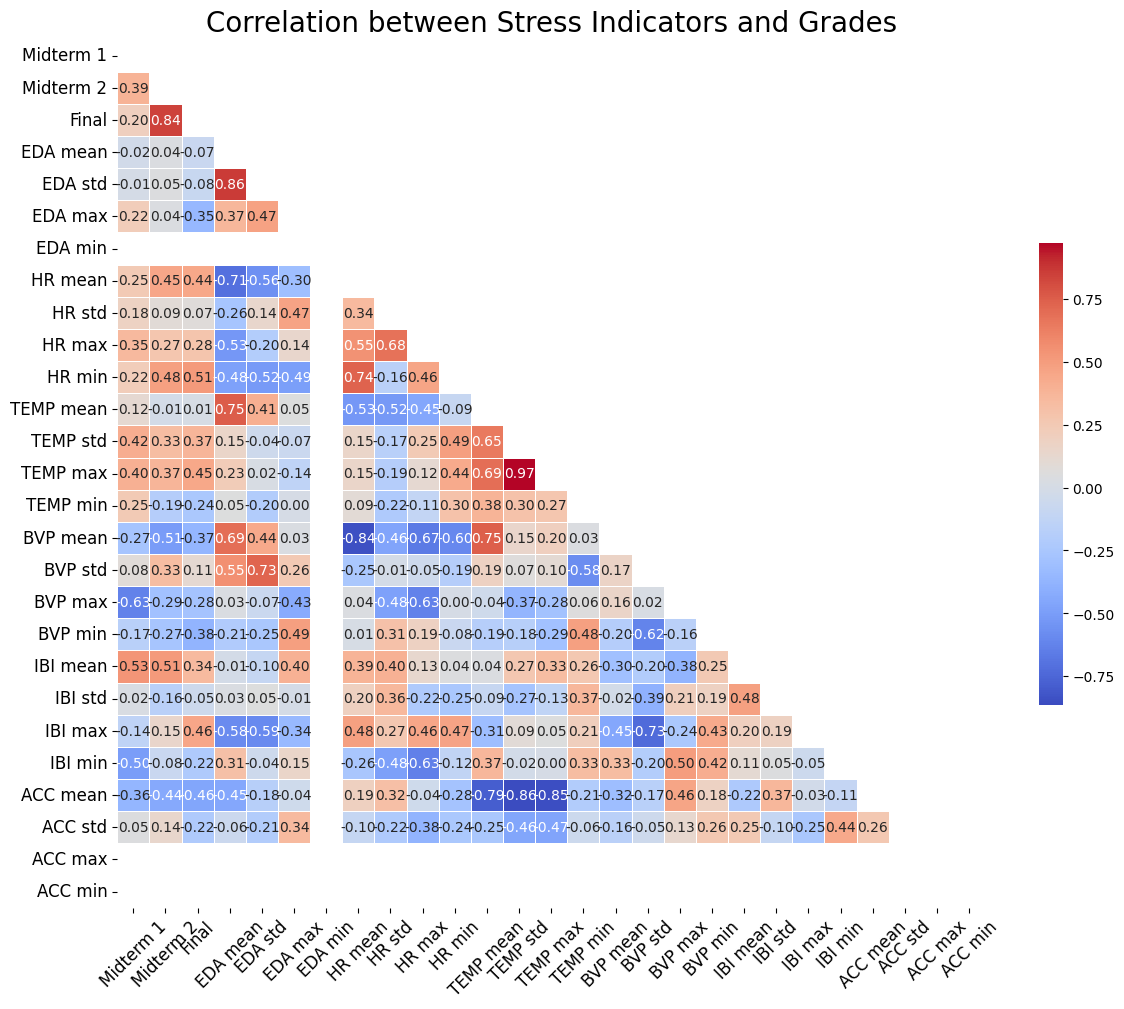

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Path to data and student grades directories
data_dir = '/content/Data'
grades_file = '/content/StudentGrades.txt'

def clean_line(line):
    line = line.replace('ñ', '-').replace('–', '-').replace('—', '-')
    line = re.sub(r'[^A-Za-z0-9\s-]', '', line)  # Remove any other non-standard characters
    return line.strip()

# Function to normalize exam names
def normalize_exam_name(exam):
    if 'Midterm 1' in exam:
        return 'Midterm 1'
    elif 'Midterm 2' in exam:
        return 'Midterm 2'
    elif 'Final' in exam:
        return 'Final'
    return exam

# Extract grades from the file
try:
    with open(grades_file, 'r', encoding='latin-1') as file:
        lines = file.readlines()
        exam = None
        for line in lines:
            line = line.strip()
            if line.startswith('GRADES'):
                exam = normalize_exam_name(line.split('-')[1].strip().title())
                print(f"Processing grades for {exam}")
            elif line and exam:
                line = clean_line(line)
                parts = line.split()
                if len(parts) == 2:
                    student = parts[0].strip()
                    grade = int(parts[1].strip())
                    if student not in grades_data['Student']:
                        grades_data['Student'].append(student)
                        grades_data['Midterm 1'].append(np.nan)
                        grades_data['Midterm 2'].append(np.nan)
                        grades_data['Final'].append(np.nan)
                    idx = grades_data['Student'].index(student)
                    grades_data[exam][idx] = grade
                else:
                    print(f"Skipping line due to unexpected format: {line}")
        print("File reading successful. Grades data extracted.")
except Exception as e:
    print(f"Error reading file: {e}")

# Ensure all lists in grades_data are of the same length
max_length = len(grades_data['Student'])
for key in grades_data:
    while len(grades_data[key]) < max_length:
        grades_data[key].append(np.nan)

# Convert to DataFrame
grades_df = pd.DataFrame(grades_data)
grades_df.columns = ['Student', 'Midterm 1', 'Midterm 2', 'Final']
print("Grades DataFrame created successfully.")
print(grades_df.head())


# Merge grades and features dataframes
combined_df = pd.merge(grades_df, features_df, on='Student', how='inner')
print("Combined DataFrame created successfully.")
print(combined_df.head())

# Ensure all data are numeric for correlation analysis
numeric_cols = combined_df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))  # Larger figure size

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .5}, square=True)

# Beautify the plot
plt.title('Correlation between Stress Indicators and Grades', fontsize=20)
plt.xticks(fontsize=12, rotation=45)  # Rotate labels for better visibility
plt.yticks(fontsize=12, rotation=0)

# Save the figure in high resolution
plt.savefig('enhanced_correlation_heatmap.png', dpi=300, bbox_inches='tight')  # High resolution for clear print quality

plt.show()
